In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from kohonen_sup import TrnParams as Trn
from kohonen_sup import KohonenSup as KohonenClass

m_font_size = 20

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.96 µs


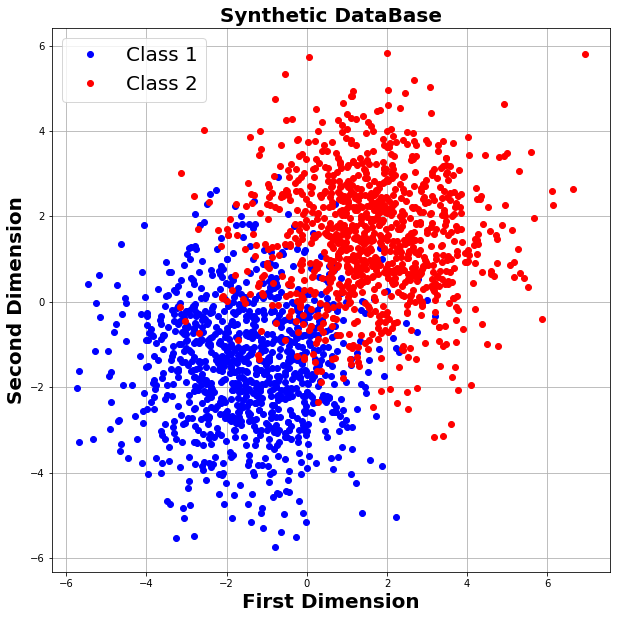

In [2]:
%time
# Create Data
n_events = 1000

# dados em 45^o
angle = np.pi/2
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.5,1.5]
m_vars = [1.5,1.5]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.5,-1.5]
m_vars = [1.5,1.5]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

# plot data
%matplotlib inline  

fig = plt.figure(figsize=(10,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.legend(fontsize=m_font_size)
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)
#limits = [-5, 5]
#plt.xlim(limits)
#plt.ylim(limits)

In [3]:
print np.mean(data[trgt==0], axis=0)
print np.mean(data[trgt==1], axis=0)

[-1.4670508  -1.46564271]
[ 1.57520031  1.46900021]


In [4]:
#train Supervised Kohonen Map

trn_params = Trn.TrnParams()

trn_params.learning_rate = 0.01

#kohonen_obj = KohonenClass.KohonenSup(W0=np.array([np.mean(data[trgt==0], axis=0), np.mean(data[trgt==1], axis=0)]))
kohonen_obj = KohonenClass.KohonenSup()
kohonen_obj.fit(data=data,trgt=trgt.astype(int),trn_params=trn_params)

Class KohonenSup TrnParams
Learning Rate: 0.01000
Verbose: False
Number of events: 2000


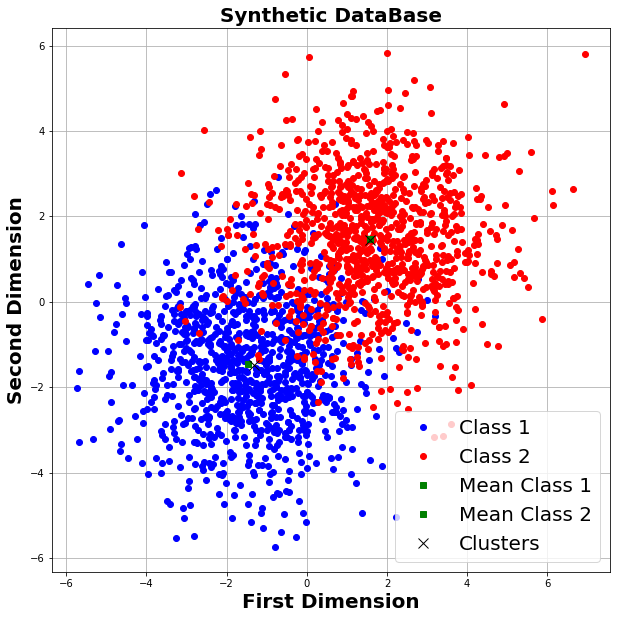

In [5]:
# plot data
%matplotlib inline  

fig = plt.figure(figsize=(10,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')
plt.plot(np.mean(data[trgt==0,0]),np.mean(data[trgt==0,1]),'gs',label='Mean Class 1')
plt.plot(np.mean(data[trgt==1,0]),np.mean(data[trgt==1,1]),'gs',label='Mean Class 2')

plt.plot(kohonen_obj.clusters[:,0],kohonen_obj.clusters[:,1],'kx',label='Clusters',markersize=10)

plt.legend(fontsize=m_font_size)
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)



In [6]:
print kohonen_obj.clusters
print np.array([np.mean(data[trgt==0], axis=0), np.mean(data[trgt==1], axis=0)])

[[-1.32635123 -1.47491803]
 [ 1.57124823  1.44721479]]
[[-1.4670508  -1.46564271]
 [ 1.57520031  1.46900021]]
